# Exploratory data analysis

Shortkeys and basic tutorial to use a Jupyter notebook:
- `Shift + Enter`: Run the current cell
- `Enter`: Enter edit mode
- `Esc`: Enter command mode
- `a`: Insert cell above
- `b`: Insert cell below
- `dd`: Delete cell
- `m`: Change cell to markdown
- `y`: Change cell to code
- `x`: Cut cell
- `c`: Copy cell
- `v`: Paste cell
- `Shift + m`: Merge selected cells
- `Shift + Arrow Up/Down`: Select multiple cells
- `Ctrl + Shift + -`: Split cell at cursor

Other remarks:
- Remember to set the kernel to the environment in the project
- Be aware of strange results if you run cells out of order

## Manual exploration of data

In [1]:
import pandas as pd

FILEPATH = "../Data/raw/CPT_PremstallerGeotechnik_revised.csv"
df = pd.read_csv(FILEPATH)
df.head()

C:\Users\TFH\AppData\Local\Temp\ipykernel_37348\2949626406.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(FILEPATH)


,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),u2 (kPa),Vs (m/s),qt (MPa),Rf (%),...,U2 (-),SBT (-),SBTn (-),Mod. SBTn (-),n,Ic (-),Ic SBT (-),Ib (-),EN_ISO_14688_classes,Oberhollenzer_classes
0,0,CPT,Zell basin,0.02,1.15,1.0,NaN,NaN,1.77,0.06,...,NaN,0.0,0.0,0.0,-0.12,2.56,2.23,25.61,NaN,NaN
1,0,CPT,Zell basin,0.04,2.85,1.0,NaN,NaN,2.99,0.03,...,NaN,0.0,0.0,0.0,0.33,1.23,2.02,256.60,NaN,NaN
2,0,CPT,Zell basin,0.06,4.80,1.0,NaN,NaN,4.76,0.06,...,NaN,0.0,0.0,0.0,0.28,1.16,1.80,264.66,NaN,NaN
3,0,CPT,Zell basin,0.08,6.40,6.0,NaN,NaN,6.12,0.07,...,NaN,0.0,0.0,0.0,0.27,1.12,1.69,275.17,NaN,NaN
4,0,CPT,Zell basin,0.10,6.90,6.0,NaN,NaN,6.91,0.10,...,NaN,0.0,0.0,0.0,0.27,1.11,1.65,267.92,NaN,NaN


In [2]:
df.columns

Index(['ID', 'test_type', 'basin_valley', 'Depth (m)', 'qc (MPa)', 'fs (kPa)',
       'u2 (kPa)', 'Vs (m/s)', 'qt (MPa)', 'Rf (%)', 'γ (kN/m³)', 'σ,v (kPa)',
       'u0 (kPa)', 'σ',v (kPa)', 'Qt (-)', 'Qtn (-)', 'Fr (%)', 'Bq (-)',
       'U2 (-)', 'SBT (-)', 'SBTn (-)', 'Mod. SBTn (-)', 'n', 'Ic (-)',
       'Ic SBT (-)', 'Ib (-)', 'EN_ISO_14688_classes',
       'Oberhollenzer_classes'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516979 entries, 0 to 2516978
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     int64  
 1   test_type              object 
 2   basin_valley           object 
 3   Depth (m)              float64
 4   qc (MPa)               float64
 5   fs (kPa)               float64
 6   u2 (kPa)               float64
 7   Vs (m/s)               float64
 8   qt (MPa)               float64
 9   Rf (%)                 float64
 10  γ (kN/m³)              float64
 11  σ,v (kPa)              float64
 12  u0 (kPa)               float64
 13  σ',v (kPa)             float64
 14  Qt (-)                 float64
 15  Qtn (-)                float64
 16  Fr (%)                 float64
 17  Bq (-)                 float64
 18  U2 (-)                 float64
 19  SBT (-)                float64
 20  SBTn (-)               float64
 21  Mod. SBTn (-)          float64
 22  n                 

Features defined by Rauter and Tschuchnigg (2019). Note: several features are derived feature engineered features.
- Derived from other features: 'Rf (%)', 'Qt (-)', 'Qtn (-)', 'Fr (%)'
- Calculated: 'γ (kN/m³)', 'σ,v (kPa)',
       'u0 (kPa)', 'σ',v (kPa)', 'Depth (m)'
- Measured: 'qc (MPa)', 'fs (kPa)'

In [2]:
FEATURES = [
    "Depth (m)",
    "qc (MPa)",
    "fs (kPa)",
    "Rf (%)",
    "σ,v (kPa)",
    "u0 (kPa)",
    "σ',v (kPa)",
    "Qtn (-)",
    "Fr (%)",
]
SITE_INFO = ["ID", "test_type", "basin_valley"]
LABELS_O = ["Oberhollenzer_classes"]
df = df.loc[:, SITE_INFO + FEATURES + LABELS_O]
df.head()

,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
0,0,CPT,Zell basin,0.02,1.15,1.0,0.06,0.38,0.20,0.18,8.04,0.06,NaN
1,0,CPT,Zell basin,0.04,2.85,1.0,0.03,0.76,0.39,0.37,185.53,0.03,NaN
2,0,CPT,Zell basin,0.06,4.80,1.0,0.06,1.14,0.59,0.55,205.79,0.06,NaN
3,0,CPT,Zell basin,0.08,6.40,6.0,0.07,1.52,0.78,0.74,226.79,0.07,NaN
4,0,CPT,Zell basin,0.10,6.90,6.0,0.10,1.90,0.98,0.92,239.52,0.10,NaN


In [5]:
df.isnull().sum()

ID                             0
test_type                      0
basin_valley                   0
Depth (m)                      0
qc (MPa)                     817
fs (kPa)                    1533
Rf (%)                      1316
σ,v (kPa)                    127
u0 (kPa)                     127
σ',v (kPa)                   127
Qtn (-)                      214
Fr (%)                      2704
Oberhollenzer_classes    1636019
dtype: int64

In [6]:
df = df.dropna()
df.head()

,ID,test_type,basin_valley,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
1486510,849,CPT,Zell basin,0.01,0.0,0.0,0.0,0.19,0.10,0.09,-27.09,0.0,4.0
1486511,849,CPT,Zell basin,0.02,0.0,0.0,0.0,0.38,0.20,0.18,-14.58,0.0,4.0
1486512,849,CPT,Zell basin,0.03,0.0,0.0,0.0,0.57,0.29,0.28,-10.41,0.0,4.0
1486513,849,CPT,Zell basin,0.04,0.0,0.0,0.0,0.76,0.39,0.37,-8.32,0.0,4.0
1486514,849,CPT,Zell basin,0.05,0.0,0.0,0.0,0.95,0.49,0.46,-7.07,0.0,4.0


In [7]:
df.shape

(879102, 13)

The balance of the target label

In [3]:
df["Oberhollenzer_classes"].value_counts()

Oberhollenzer_classes
5.0    208584
6.0    180495
7.0    163805
1.0     99422
4.0     98888
0.0     79010
2.0     43776
3.0      6980
Name: count, dtype: int64

In [9]:
df["basin_valley"].value_counts()

basin_valley
Salzburg basin                   444882
Zell basin                       222794
Flachgau                          81818
Upper Salzach valley              37284
Saalfelden basin                  22479
Lower Salzach valley              19366
Gastein valley                    12756
Wildschönau region                10799
Pinzgau Saalach valley             7839
Hallein basin                      6451
Enns valley - Radtstadt basin      5038
Pinzgau (Hinterthal, Dienten)      3309
Abtenau basin                      2077
Eisenstadt-Sopron basin            1500
Glemm valley                        710
Name: count, dtype: int64

In [10]:
# run describe on the numberical features
pd.set_option("display.float_format", "{:.2f}".format)
numeric_features = df[FEATURES].select_dtypes(include=["number"]).columns
df[numeric_features].describe()
# pd.reset_option('display.float_format')

,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%)
count,879102.00,879102.00,879102.00,879102.00,879102.00,879102.00,879102.00,879102.00,879102.00
mean,11.47,5.23,54.70,2.53,218.00,105.65,112.35,67.49,3.76
std,9.33,8.39,71.31,37.96,177.24,91.04,88.35,124.03,87.90
min,0.01,-0.20,-99.90,-100.00,0.19,0.00,0.09,-127.57,-100.00
25%,4.58,0.94,16.00,0.70,87.02,38.36,46.87,5.61,0.75
50%,9.49,2.14,31.40,1.40,180.31,86.23,94.20,25.02,1.68
75%,15.86,5.75,64.90,2.58,301.34,147.84,154.97,65.79,3.39
max,73.84,101.73,1389.60,22000.00,1402.96,724.37,678.59,1001.00,33166.67


## Automated EDA

ydata-profiling for automated EDA

In [11]:
dfy = df.copy()[FEATURES + LABELS_O]
dfy.head()

,Depth (m),qc (MPa),fs (kPa),Rf (%),"σ,v (kPa)",u0 (kPa),"σ',v (kPa)",Qtn (-),Fr (%),Oberhollenzer_classes
1486510,0.01,0.00,0.00,0.00,0.19,0.10,0.09,-27.09,0.00,4.00
1486511,0.02,0.00,0.00,0.00,0.38,0.20,0.18,-14.58,0.00,4.00
1486512,0.03,0.00,0.00,0.00,0.57,0.29,0.28,-10.41,0.00,4.00
1486513,0.04,0.00,0.00,0.00,0.76,0.39,0.37,-8.32,0.00,4.00
1486514,0.05,0.00,0.00,0.00,0.95,0.49,0.46,-7.07,0.00,4.00


In [12]:
# Change type of labels to strings, so ydata-profiling interprets it as a categorical variable.
dfy["Oberhollenzer_classes"] = dfy["Oberhollenzer_classes"].astype(str)
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879102 entries, 1486510 to 2516978
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Depth (m)              879102 non-null  float64
 1   qc (MPa)               879102 non-null  float64
 2   fs (kPa)               879102 non-null  float64
 3   Rf (%)                 879102 non-null  float64
 4   σ,v (kPa)              879102 non-null  float64
 5   u0 (kPa)               879102 non-null  float64
 6   σ',v (kPa)             879102 non-null  float64
 7   Qtn (-)                879102 non-null  float64
 8   Fr (%)                 879102 non-null  float64
 9   Oberhollenzer_classes  879102 non-null  object 
dtypes: float64(9), object(1)
memory usage: 73.8+ MB


In [13]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dfy, title="Profiling report")
profile.to_file("dataset_profiling_cpt.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:01<00:00,  7.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

What do you need to check in the dataset?
- What distributions do the features have?
- Are there any missing values?
- Are there any duplicates?
- Are there any outliers? Be cautious with this one, as outliers can be valid data points.
- Are there any relationships between the features? Some features might be removed if they are highly correlated.
- Are there any relationships between the features and the target variable? Only in regression.
- Are there any relationships between the features and the target variable that are not linear? Only in regression.
- Are the labels balanced?


Trends in the data
- Not normally distributed
- Duplicate values
- Correlated features
- outliers present

## Preprocessing

In [14]:
df.shape

(879102, 13)

Duplicate values

In [15]:
df = df.drop_duplicates(subset=FEATURES)
df.shape

(867949, 13)

### Outliers

Hardcoded values (values that are not possible in the real world) are removed.

In [16]:
# hardcoded
df = df[df["qc (MPa)"] > 0]
df = df[df["u0 (kPa)"] >= 0]
df = df[df["Qtn (-)"] > 0]
df = df[(df["fs (kPa)"] < 1200) & (df["fs (kPa)"] > 0)]
# df = df[(df['Rf (%)'] < 10) & (df['Rf (%)'] > 0)]
df = df[df["Rf (%)"] > 0]
df = df[(df["Fr (%)"] < 10) & (df["Fr (%)"] > 0)]
# skip samples with label 3.0
# df = df[df['Oberhollenzer_classes'] != 3.0] # due to low sample size
df = df[df["Oberhollenzer_classes"] != 0.0]  # due to low sample size
df.shape

(746814, 13)

Univariate outlier detection - we exemplify for one feature

In [18]:
%matplotlib inline

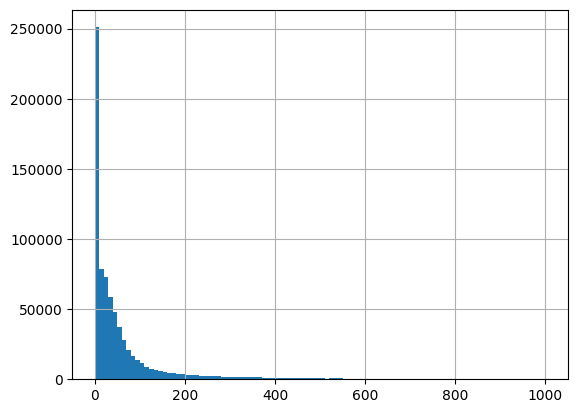

In [19]:
import matplotlib.pyplot as plt

df["Qtn (-)"].hist(bins=100)
plt.show()

In [20]:
# univariate
from pyod.models.mad import MAD

threshold = 7.0  # Typical value, can be adjusted for sensitivity
mad = MAD(threshold=threshold)

# Fit the model on the column
mad.fit(df[["Qtn (-)"]])

# Predict outliers (1 for outlier, 0 for inlier)
outliers = mad.predict(df[["Qtn (-)"]])

# Filter the DataFrame to exclude outliers
df_no_outliers = df[outliers == 0]

c:\Users\TFH\git_projects\course-machine-learning-for-geotechnics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\TFH\git_projects\course-machine-learning-for-geotechnics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\TFH\git_projects\course-machine-learning-for-geotechnics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [21]:
sum(outliers)

43406

<Axes: >

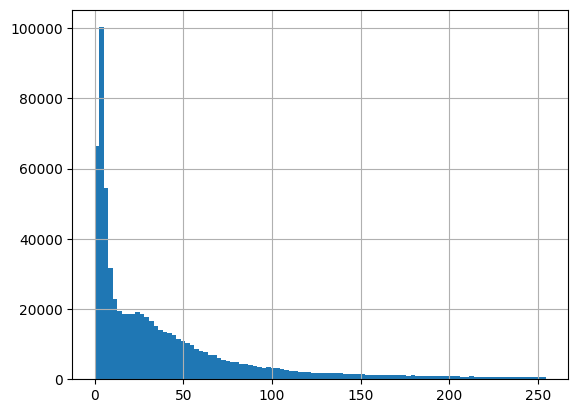

In [22]:
df_no_outliers["Qtn (-)"].hist(bins=100)

Multivariate outlier detection

In [23]:
df[FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 746814 entries, 1486548 to 2516970
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Depth (m)   746814 non-null  float64
 1   qc (MPa)    746814 non-null  float64
 2   fs (kPa)    746814 non-null  float64
 3   Rf (%)      746814 non-null  float64
 4   σ,v (kPa)   746814 non-null  float64
 5   u0 (kPa)    746814 non-null  float64
 6   σ',v (kPa)  746814 non-null  float64
 7   Qtn (-)     746814 non-null  float64
 8   Fr (%)      746814 non-null  float64
dtypes: float64(9)
memory usage: 57.0 MB


In [24]:
from pyod.models.iforest import IForest

outlier_confidence_threshold = 0.95  # Adjust threshold for your use case

# Initialize and fit the Isolation Forest model
iforest = IForest(n_estimators=100)
iforest.fit(df[FEATURES])

# Get the outlier probabilities
probs = iforest.predict_proba(df[FEATURES])[:, 1]

# Create a mask for outliers based on the confidence threshold
is_outlier = probs > outlier_confidence_threshold
outliers = df[is_outlier]
non_outliers = df[~is_outlier]

# Display results
num_outliers = len(outliers)
print(f"Number of outliers with Isolation Forest: {num_outliers}")
print(f"Percentage of outliers: {num_outliers / len(df):.4f}")
print("Outlier samples:\n", outliers)

# Cleaned DataFrame excluding outliers
df_cleaned = df[~is_outlier]

c:\Users\TFH\git_projects\course-machine-learning-for-geotechnics\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Number of outliers with Isolation Forest: 409
Percentage of outliers: 0.0005
Outlier samples:
            ID test_type    basin_valley  Depth (m)  qc (MPa)  fs (kPa)  \
1748255   972      SCPT  Salzburg basin      66.03      3.29    109.50   
1748256   972      SCPT  Salzburg basin      66.04      3.29    110.50   
1748257   972      SCPT  Salzburg basin      66.05      3.28    114.70   
1748258   972      SCPT  Salzburg basin      66.06      3.20    117.10   
1748259   972      SCPT  Salzburg basin      66.07      3.20    120.40   
...       ...       ...             ...        ...       ...       ...   
2505616  1332       CPT  Salzburg basin      65.14      5.97    130.60   
2505617  1332       CPT  Salzburg basin      65.15      5.90    125.90   
2505618  1332       CPT  Salzburg basin      65.16      5.98    118.60   
2505619  1332       CPT  Salzburg basin      65.17      6.06    116.80   
2505620  1332       CPT  Salzburg basin      65.18      6.72    115.10   

         Rf (%) 

A classic splitting of the dataset in train and test sets

In [25]:
from sklearn.model_selection import train_test_split

X = df_cleaned[FEATURES]
y = df_cleaned["Oberhollenzer_classes"]
seed = 10
test_size = 0.25
train, test = train_test_split(
    df_cleaned, test_size=test_size, random_state=seed, stratify=y
)

In [26]:
train.shape, test.shape

((559803, 13), (186602, 13))

Inspecting the effect of stratification

In [27]:
train["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
5.00   0.27
6.00   0.23
7.00   0.20
4.00   0.13
1.00   0.12
2.00   0.05
3.00   0.01
Name: proportion, dtype: float64

In [28]:
test["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
5.00   0.27
6.00   0.23
7.00   0.20
4.00   0.13
1.00   0.12
2.00   0.05
3.00   0.01
Name: proportion, dtype: float64

Typical geotechnical problem: data from same borehole should not be split between train and test set. Then there is a risk of data leakage.

In [29]:
unique_ids = df["ID"].unique()
train_ids, _ = train_test_split(unique_ids, test_size=test_size, random_state=seed)
train_ids

array([1125,  979, 1018,  930, 1031, 1278, 1210, 1281, 1149, 1130,  976,
       1257,  906,  887,  916, 1192,  862,  947,  980, 1313,  934, 1231,
        951, 1294, 1049, 1289, 1150,  926, 1016,  997, 1227, 1043,  963,
       1036, 1207,  902,  877, 1233,  914,  959, 1005, 1188,  960,  888,
        955, 1039, 1063, 1183,  925, 1134, 1267,  971, 1190, 1096,  919,
       1015, 1218, 1077,  908, 1143, 1067,  907,  937, 1025, 1271, 1253,
       1081,  942,  956,  879, 1269, 1046, 1152,  867, 1173,  851,  909,
        913,  875, 1316, 1243, 1066, 1297, 1082,  870, 1132, 1042, 1133,
       1021, 1280, 1174,  974, 1050, 1166, 1182,  954, 1156, 1091, 1191,
       1151, 1224,  886,  988, 1217, 1117, 1181, 1187, 1065, 1308, 1208,
       1246, 1221, 1213,  970,  885, 1185, 1249,  869, 1157,  982, 1057,
       1158, 1238, 1044, 1053,  958,  855,  998, 1255, 1311, 1052, 1009,
       1330, 1163, 1059, 1201, 1226,  871, 1169,  977,  899, 1161, 1204,
       1203, 1325, 1106, 1273, 1300, 1237,  967, 11

In [31]:
train_df = df[df["ID"].isin(train_ids)]
test_df = df[~df["ID"].isin(train_ids)]

In [32]:
train_df.shape, test_df.shape

((561363, 13), (185451, 13))

In [33]:
train_df["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
5.00   0.28
6.00   0.21
7.00   0.20
4.00   0.13
1.00   0.12
2.00   0.05
3.00   0.01
Name: proportion, dtype: float64

In [34]:
test_df["Oberhollenzer_classes"].value_counts(normalize=True)

Oberhollenzer_classes
6.00   0.26
5.00   0.25
7.00   0.21
4.00   0.12
1.00   0.12
2.00   0.04
3.00   0.01
Name: proportion, dtype: float64

In [ ]:
# another round in ydate-profiling with splitted dataset
from ydata_profiling import ProfileReport

dfy_train = train_df.copy()[FEATURES + LABELS_O]
dfy_test = test_df.copy()[FEATURES + LABELS_O]
dfy_train["Oberhollenzer_classes"] = dfy_train["Oberhollenzer_classes"].astype(str)
dfy_test["Oberhollenzer_classes"] = dfy_test["Oberhollenzer_classes"].astype(str)
profile_train = ProfileReport(dfy_train, title="Profiling report - Train")
profile_test = ProfileReport(dfy_test, title="Profiling report - Test")
comparison_report = profile_train.compare(profile_test)
comparison_report.to_file("./profiling_reports/dataset_profiling_comparison_cpt.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.35it/s]
